In [1]:
import numpy as np
from matplotlib import pyplot as plt
from groupyr import LogisticSGL
from groupyr.logistic import WeightedLogisticSGL
import pandas as pd


In [2]:
def mark_as_categorical(dataframe: pd.DataFrame, category: str):
    dataframe[category] = dataframe[category].astype('category')

def get_categories(dataframe: pd.DataFrame):
    return [col for col in dataframe.select_dtypes(include="category")]

In [3]:
def create_groups_from_1hot(data_frame: pd.DataFrame):
    expanded = pd.get_dummies(data_frame)
    groups = {col: [] for col in data_frame}
    for idx, col in enumerate(expanded):
        category = col.split("_")[0]
        groups[category].append(idx)

    groups = {k: np.array(v) for k, v in groups.items()}
    return expanded, groups

In [4]:
kid_data = pd.read_csv("data.csv", delimiter=";")

In [5]:
mark_as_categorical(kid_data, "MaritalStatus")
mark_as_categorical(kid_data, "ApplicationMode")
mark_as_categorical(kid_data, "ApplicationOrder")
mark_as_categorical(kid_data, "TimeOfDay")
mark_as_categorical(kid_data, "PreviousQualification")
mark_as_categorical(kid_data, "Nationality")
mark_as_categorical(kid_data, "MotherQualification")
mark_as_categorical(kid_data, "FatherQualification")
mark_as_categorical(kid_data, "MotherOccupation")
mark_as_categorical(kid_data, "FatherOccupation")
mark_as_categorical(kid_data, "Course")
target = kid_data.get("Target").replace(['Dropout', 'Graduate', 'Enrolled'], [0, 1, 1]).astype(float),


for col in kid_data.select_dtypes(include=["float64", "int"], exclude="category"):
    kid_data[col] /= kid_data[col].max()

expanded_X, group_idxs = create_groups_from_1hot(kid_data.drop(columns="Target"))
expanded_X

,PreviousGrade,AdmissionGrade,Displaced,SpecialNeeds,Debtor,TuitionPaid,Gender,Scholarship,Age,International,...,FatherOccupation_172,FatherOccupation_174,FatherOccupation_175,FatherOccupation_181,FatherOccupation_182,FatherOccupation_183,FatherOccupation_192,FatherOccupation_193,FatherOccupation_194,FatherOccupation_195
0,0.642105,0.670000,1.0,0.0,0.0,1.0,1.0,0.0,0.285714,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0.842105,0.750000,1.0,0.0,0.0,0.0,1.0,0.0,0.271429,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0.642105,0.656842,1.0,0.0,0.0,0.0,1.0,0.0,0.271429,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0.642105,0.629474,1.0,0.0,0.0,1.0,0.0,0.0,0.285714,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0.526316,0.744737,0.0,0.0,0.0,1.0,0.0,0.0,0.642857,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,0.657895,0.643158,0.0,0.0,0.0,1.0,1.0,0.0,0.271429,0.0,...,0,0,0,0,0,0,0,0,0,0
4420,0.631579,0.626316,1.0,0.0,1.0,0.0,0.0,0.0,0.257143,1.0,...,0,0,0,0,0,0,0,0,0,0
4421,0.810526,0.786842,1.0,0.0,0.0,1.0,0.0,1.0,0.428571,0.0,...,0,0,0,0,0,0,0,0,0,0
4422,0.947368,0.809474,1.0,0.0,0.0,1.0,0.0,1.0,0.285714,0.0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
kid_data.get("Target").value_counts()*0.8

Graduate    1767.2
Dropout     1136.8
Enrolled     635.2
Name: Target, dtype: float64

In [7]:
get_categories(kid_data)

['MaritalStatus',
 'ApplicationMode',
 'ApplicationOrder',
 'Course',
 'TimeOfDay',
 'PreviousQualification',
 'Nationality',
 'MotherQualification',
 'FatherQualification',
 'MotherOccupation',
 'FatherOccupation']

In [8]:
from groupyr import LogisticSGLCV
from sklearn.model_selection import train_test_split


X = expanded_X.to_numpy(np.float64)
y = kid_data['Target'].replace(['Dropout', 'Graduate', 'Enrolled'], [1, 0, 0]).to_numpy(np.float64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape)
print(y_train.shape)

(3539, 255)
(3539,)


In [16]:
from sklearn.multiclass import OneVsRestClassifier

group_model = WeightedLogisticSGL(scale=2, groups=list(group_idxs.values()), l1_ratio=1, alpha=0.01,
    verbose=2, suppress_solver_warnings=False, max_iter=10000
)
#one_v_all = OneVsRestClassifier(group_model, n_jobs=3).fit(X_train, y_train)
one_v_all = group_model.fit(X_train, y_train)

0.7257240204429303
0.8180790960451978


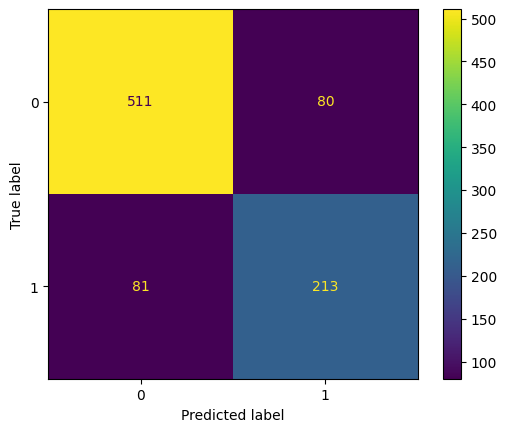

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.metrics as metrics
y_pred = one_v_all.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print(metrics.f1_score(y_test, y_pred))
print(one_v_all.score(X_test, y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,)
disp.plot()

In [11]:
np.mean(y)

0.3212025316455696

In [12]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', max_iter=10000).fit(X_train, y_train)
y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))
#print(metrics.f1_score(y_test, y_pred))
print(model.score(X_test, y_test))

[[559  32]
 [ 67 227]]
0.888135593220339


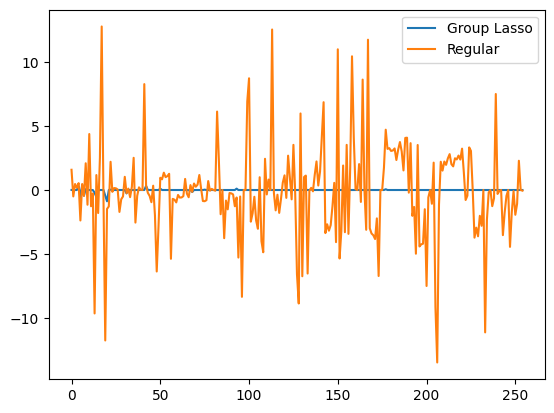

In [13]:
plt.plot(group_model.coef_, label="Group Lasso")
plt.plot(model.coef_.squeeze(), label="Regular")
plt.legend()

In [14]:
print(expanded_X.columns[abs(group_model.coef_) > 1e-3])
print(expanded_X.columns[np.argmax(abs(group_model.coef_))])

Index(['PreviousGrade', 'Debtor', 'TuitionPaid', 'Gender', 'Scholarship',
       'Age', 'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)', 'Unemployment rate',
       'ApplicationMode_1', 'ApplicationMode_39', 'ApplicationOrder_1',
       'Course_9238', 'Course_9500', 'TimeOfDay_1', 'Nationality_1',
       'MotherQualification_34', 'MotherQualification_37',
       'FatherQualification_34', 'FatherQualification_38',
       'MotherOccupation_0'],
      dtype='object')
Curricular units 2nd sem (grade)


In [15]:
np.mean(kid_data['Curricular units 1st sem (evaluations)'] >= kid_data['Curricular units 1st sem (enrolled)'])

0.22716998191681737

Try running regular logistic regression in scikit with multiclass class and compare results
Logistic Regression
SVM
A boosted method from their paper
Completely redo the basic scikit learn classifiers
Try a neural network
Jared and Jordan

Stretch - Investigate adding multiclass classification to groupyr
Weighting of classes by size in groupyr
-Alec

Try PCA and LogisticPCA to do feature extraction
TBD - (Alec)
Backward AIC regression
Jared

Plot correlations of variables
Jordan

Report:
Write background/motivation sections

$$\frac{1}{2 n}\sum_{i=1}^n b_i \log(\sigma(\bs{a}_i^T \bs{x}))
         + (1 - b_i) \log(1 - \sigma(\bs{a}_i^T \bs{x}))$$